In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib

In [ ]:
pd.set_option('display.max_columns', 85)

In [ ]:
df=pd.read_csv('/content/Copper_Set Result 1.csv')

<ipython-input-91-b95a7be6f467>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Copper_Set Result 1.csv')


In [ ]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [ ]:
df.drop(['id','item_date','material_ref','delivery date'],axis=1,inplace=True)

In [ ]:
df['quantity tons']=pd.to_numeric(df['quantity tons'], errors='coerce')

In [ ]:
categorical_col=['customer', 'country', 'status', 'item type', 'application', 'product_ref']
df[categorical_col]=df[categorical_col].astype('category')

In [ ]:
df.shape

(181673, 10)

In [ ]:
df.isnull().sum()

quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181639 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   quantity tons  181639 non-null  float64 
 1   customer       181639 non-null  category
 2   country        181639 non-null  category
 3   status         181639 non-null  category
 4   item type      181639 non-null  category
 5   application    181639 non-null  category
 6   thickness      181639 non-null  float64 
 7   width          181639 non-null  float64 
 8   product_ref    181639 non-null  category
 9   selling_price  181639 non-null  float64 
dtypes: category(6), float64(4)
memory usage: 8.2 MB


In [ ]:
df.describe()

,quantity tons,thickness,width,selling_price
count,1.816390e+05,181639.000000,181639.000000,1.816390e+05
mean,5.875974e+03,2.564145,1295.265103,1.918323e+03
std,2.349295e+06,6.572500,261.641088,3.318258e+05
min,-2.000000e+03,0.180000,1.000000,-1.160000e+03
25%,1.096869e+01,0.700000,1180.000000,6.690000e+02
50%,3.036395e+01,1.500000,1250.000000,8.120000e+02
75%,6.716187e+01,3.000000,1500.000000,9.530000e+02
max,1.000000e+09,2500.000000,2990.000000,1.000010e+08


 Displaying Outliers

<Axes: >

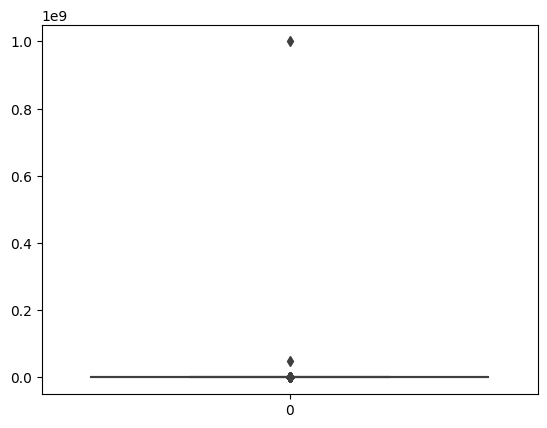

In [ ]:
sns.boxplot(df['quantity tons'])

<Axes: >

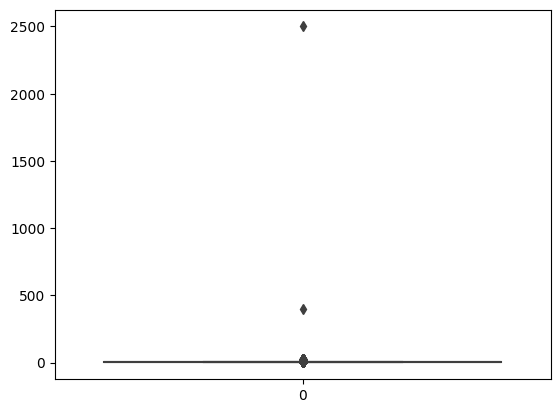

In [ ]:
sns.boxplot(df['thickness'])

<Axes: >

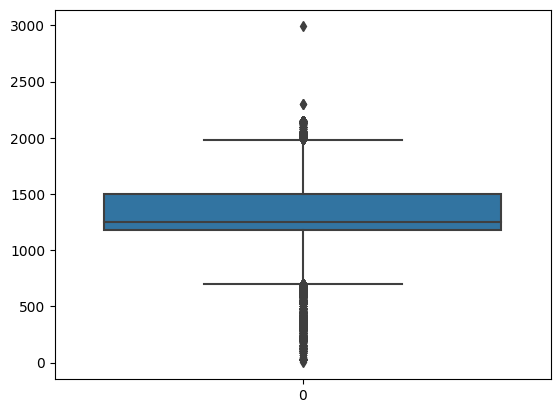

In [ ]:
sns.boxplot(df['width'])

<Axes: >

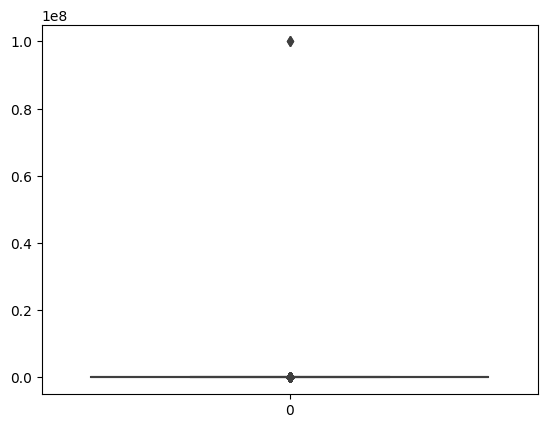

In [ ]:
sns.boxplot(df['selling_price'])

In [ ]:
#Handling outlier by interquantile method
col=['quantity tons','thickness','width','selling_price']
for i in col:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  IQR=q3-q1
  LC=q1-1.5*IQR
  UC=q3+1.5*IQR
  df=df[(df[i]>=LC) & (df[i]<=UC)]

In [ ]:
df.shape

(136400, 10)

After treating outliers

<Axes: >

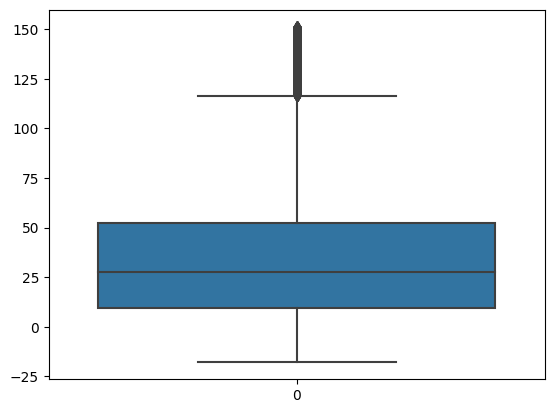

In [ ]:
sns.boxplot(df['quantity tons'])

<Axes: >

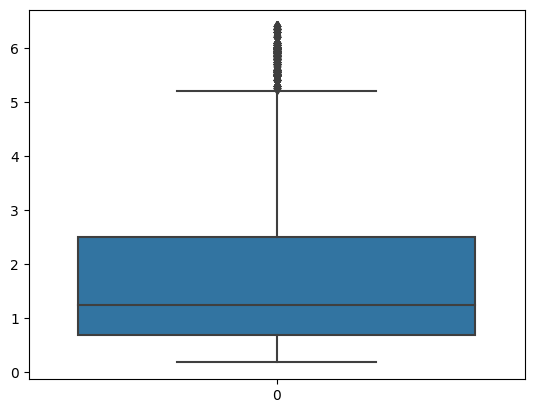

In [ ]:
sns.boxplot(df['thickness'])

<Axes: >

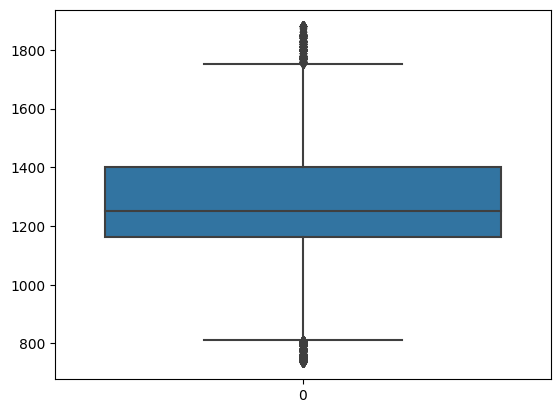

In [ ]:
sns.boxplot(df['width'])

<Axes: >

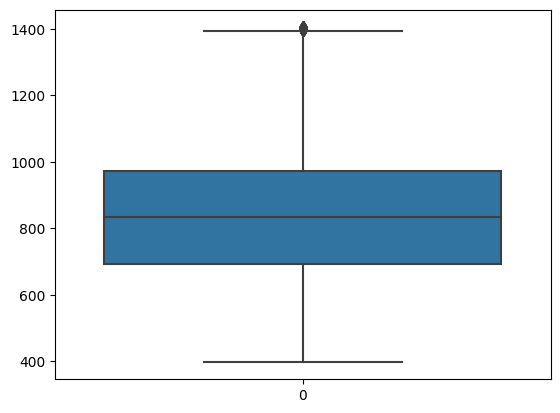

In [ ]:
sns.boxplot(df['selling_price'])

In [ ]:
df.describe()

,quantity tons,thickness,width,selling_price
count,136400.000000,136400.000000,136400.000000,136400.000000
mean,36.132989,1.800179,1258.899267,843.886404
std,32.845107,1.444765,184.328306,192.289360
min,-18.000000,0.180000,735.000000,396.000000
25%,9.576610,0.680000,1164.000000,693.000000
50%,27.705210,1.250000,1250.000000,833.000000
75%,52.321948,2.500000,1400.000000,973.000000
max,151.450064,6.400000,1880.000000,1407.000000


In [ ]:
df.shape

(136400, 10)

In [ ]:
df.skew().sort_values(ascending=False)

<ipython-input-114-1ddffe11183f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


quantity tons    1.291980
thickness        1.277152
selling_price    0.352909
width           -0.030890
dtype: float64

In [ ]:
df[['selling_price','thickness','quantity tons']]=df[['selling_price','thickness','quantity tons']].apply(lambda x:np.log(x))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.skew().sort_values(ascending=False)

<ipython-input-116-1ddffe11183f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


thickness        0.203635
width           -0.030890
selling_price   -0.153164
quantity tons   -0.967468
dtype: float64

In [ ]:
df.describe()

,quantity tons,thickness,width,selling_price
count,136398.000000,136400.000000,136400.000000,136400.000000
mean,3.072423,0.285737,1258.899267,6.711777
std,1.184459,0.779150,184.328306,0.230695
min,-11.512925,-1.714798,735.000000,5.981414
25%,2.259333,-0.385662,1164.000000,6.541030
50%,3.321627,0.223144,1250.000000,6.725034
75%,3.957424,0.916291,1400.000000,6.880384
max,5.020256,1.856298,1880.000000,7.249215


Numeric prediction

In [ ]:
nominal_col=['item type','status']
dff=pd.get_dummies(df[nominal_col])
dff[['quantity tons','customer','country','application','thickness','width','product_ref','selling_price']]=df[['quantity tons','customer','country','application','thickness','width','product_ref','selling_price']]

In [ ]:
dff=dff.dropna()

In [ ]:
dff

,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI,status_Draft,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won,status_Wonderful,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3.991779,30156308.0,28.0,10.0,0.693147,1500.0,1670798778,6.749931
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4.730808,30342192.0,32.0,41.0,-0.385662,1220.0,611993,6.836259
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4.235147,30341428.0,38.0,10.0,-0.510826,1275.0,1668701376,7.217443
11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4.736160,30342192.0,32.0,41.0,-0.597837,1220.0,611993,6.860664
12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3.314642,30165529.0,78.0,10.0,-0.287682,1250.0,164141591,7.001246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181665,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.819573,30200854.0,25.0,41.0,-0.342490,1300.0,164141591,6.410175
181666,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4.408228,30200854.0,25.0,41.0,0.165514,1220.0,164141591,6.380123
181667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4.670802,30200854.0,25.0,41.0,-0.040822,1240.0,164141591,6.400257
181668,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4.629691,30200854.0,25.0,41.0,-0.040822,1220.0,164141591,6.381816


In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,confusion_matrix
import math

In [ ]:
X=dff.drop(['selling_price'],axis=1)
y=dff['selling_price']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
dtr = DecisionTreeRegressor()

param_grid={
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

grid_search=GridSearchCV(estimator=dtr,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
optimized_model=grid_search.best_estimator_
test_pred=optimized_model.predict(x_test)

In [ ]:
print("Mean squared error: ",mean_squared_error(test_pred,y_test))
print("R2 score: ",r2_score(test_pred,y_test))

Mean squared error:  0.02637248816552076
R2 score:  0.06499098932139902


Categorical prediction

In [ ]:
cat=df[df['status'].isin(['Won','Lost'])]

In [ ]:
cat_encoding=pd.get_dummies(cat,columns=['item type'])

In [ ]:
cat_encoding=cat_encoding.dropna(axis=0)

In [ ]:
cat_encoding

,quantity tons,customer,country,status,application,thickness,width,product_ref,selling_price,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,3.991779,30156308.0,28.0,Won,10.0,0.693147,1500.0,1670798778,6.749931,0,0,0,0,0,1,0
7,4.730808,30342192.0,32.0,Won,41.0,-0.385662,1220.0,611993,6.836259,0,0,0,0,0,1,0
8,4.235147,30341428.0,38.0,Won,10.0,-0.510826,1275.0,1668701376,7.217443,0,0,0,1,0,0,0
11,4.736160,30342192.0,32.0,Won,41.0,-0.597837,1220.0,611993,6.860664,0,0,0,0,0,1,0
12,3.314642,30165529.0,78.0,Won,10.0,-0.287682,1250.0,164141591,7.001246,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181665,1.819573,30200854.0,25.0,Won,41.0,-0.342490,1300.0,164141591,6.410175,0,0,0,0,0,1,0
181666,4.408228,30200854.0,25.0,Won,41.0,0.165514,1220.0,164141591,6.380123,0,0,0,0,0,1,0
181667,4.670802,30200854.0,25.0,Won,41.0,-0.040822,1240.0,164141591,6.400257,0,0,0,0,0,1,0
181668,4.629691,30200854.0,25.0,Won,41.0,-0.040822,1220.0,164141591,6.381816,0,0,0,0,0,1,0


In [ ]:
feature=cat_encoding.drop(['status'],axis=1)
target=cat_encoding['status']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=1)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
test_pred=dtc.predict(x_test)

In [ ]:
print('Accuracy score:',accuracy_score(test_pred,y_test))
print('Confusion matrix:',confusion_matrix(test_pred,y_test))

Accuracy score: 0.9123928835530036
Confusion matrix: [[ 3709  1023]
 [  991 17266]]


In [ ]:
joblib.dump(optimized_model,'regress_model.joblib')

In [ ]:
joblib.dump(dtc,'classify_model.joblib')